In [24]:
#Þurfum líklega ekki öll þessi import. Sumt er copy-paste
import nltk
import re
import json
import urllib.request
import pandas as pd 
import numpy as np
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.book import *
import re
import io
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
#Create the corpus
corpus_root = 'cleanCheck'
newcorpus = PlaintextCorpusReader(corpus_root, '.*')

In [5]:
#Create DataFrame and read all attributes from csv
df_characters = pd.DataFrame()
df_characters = pd.read_csv("ZeldaBotW_nodes_w_attributes_enriched.csv")

In [6]:
df_characters

,Name,Role,Race,Gender
0,Baddek,Ally,Hylian,Male
1,Bamboo,Ally,Horse,Unknown
2,Banji,Ally,Hylian,Female
3,Baumar,Ally,Hylian,Male
4,Bayge,Ally,Goron,Male
...,...,...,...,...
651,Waterblight Ganon,Boss,Unknown,Unknown
652,Master Kohga,Boss,Sheikah,Male
653,Monk Maz Koshia,Boss,Sheikah,Male
654,Calamity Ganon,Boss,Gerudo,Male


In [16]:
#Hérna var ég að spá í að gera nýtt df fyrir hvert race sem þarf að nota
df_Hylian = df_characters.loc[(df_characters['Race'] == 'Hylian')]
df_Zora = df_characters.loc[(df_characters['Race'] == 'Zora')]
df_Goron = df_characters.loc[(df_characters['Race'] == 'Goron')]
df_Gerudo = df_characters.loc[(df_characters['Race'] == 'Gerudo')]
df_Rito = df_characters.loc[(df_characters['Race'] == 'Rito')]

In [17]:
names = df_characters.Name.values
hylians = df_Hylian.Name.values
zoras = df_Zora.Name.values
gorons = df_Goron.Name.values
gerudos = df_Gerudo.Name.values
ritos = df_Rito.Name.values
print(hylians)

['Baddek' 'Banji' 'Baumar' 'Bolson' 'Brigo' 'Cambo' 'Chabi' 'Chork'
 'Chumin' 'Dabi' 'Ena' 'Endai' 'Hudson' 'Hylia' 'Kanny' 'Karson' 'Kenyo'
 'Kilton' 'Leekah' 'Link' 'Meeshy' 'Meghyn' 'Mils' 'Mina' 'Nat' 'Nazbi'
 'Regan' 'Rik' 'Ronn' 'Savelle' 'Sho' 'Sorelia' 'Spoone' 'Toren' 'Totsuna'
 'Tye' 'Yammo' 'Princess_Zelda' 'Zyle' 'Pitar' 'Dmitri' 'Gleema' 'Jana'
 'Kaifa' 'Lonni' 'Nell' 'Rex' 'Stamm' 'Tenne' 'Granté' 'Hagie' 'Hunnie'
 'Moggs' 'Monari' 'Ruli' 'Aya' 'Hoz' 'Jerrin' 'Khini' 'Nobo' 'Rudi'
 'Glendo' 'King_Rhoam' 'Old_Man' 'Aliza' 'Benny' 'Botrick' 'Canni' 'Dai'
 'Gotter' 'Haite' 'Myti' 'Parcy' 'Toffa' 'Trott' 'Branli' 'Konba' 'Ashe'
 'Breen' 'Dayto' 'Douma' 'Fin' 'Gaile' 'Kima' 'Kish' 'Mayro' 'Molo'
 'Ozunda' 'Russ' 'Shamae' 'Zorona' 'Akrah' 'Garshon' 'Onya' 'Sprinn'
 'Zumi' 'Blynne' 'Jini' 'Loone' 'Padok' 'Perosa' 'Phanna' 'Straia'
 'Suzuna' 'Gartan' 'Benja' 'Dillie' 'Jora' 'Bozai' 'Jules' 'Tauma'
 'Traysi' 'Nobiro' 'Robsten' 'Vilia' 'Canolo' 'Flaxel' 'Maypin' 'Moza'
 'Oliff' 'Pa

In [8]:
baseurl = "https://zelda.fandom.com/api.php?"
action = "action=query"
# titleCharacters = "titles=Characters_in_Breath_of_the_Wild"
# titleEnemies = "titles=Enemies_in_Breath_of_the_Wild"
# titleBosses = "titles=Bosses_in_Breath_of_the_Wild"
title = "titles="
content="prop=extracts&exlimit=1&explaintext"
dataformat = "format=json"

tokenizer = RegexpTokenizer(r'\w+')

In [9]:
for index, row in df_characters.iterrows():
    row['Name'] = row['Name'].replace(" ", "_")
    name = urllib.parse.quote_plus(row['Name'])
    title = "titles=" + name

    query1 = "{}{}&{}&{}&{}".format(baseurl, action, content, title , dataformat)
    wikiresponse1 = urllib.request.urlopen(query1)
    wikidata1 = wikiresponse1.read()
    wikitext1 = wikidata1.decode('utf-8')
    response = json.loads(wikitext1)
    pageid =list(response['query']['pages'].keys())[0]
    responseContent = response['query']['pages'][pageid]['extract']
    
    text_file = open("newtxt/" + row['Name'] + ".txt", "wt")
    n = text_file.write(responseContent)
    text_file.close()

In [13]:
#CLEANING THE TEXT FILES - WEEK 7

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
wnl = nltk.WordNetLemmatizer()

for name in names:
    file1 = open("newtxt/" + name + ".txt")

    # Use this to read file content as a stream:
    theText = file1.read()

    # Regex
    theText = re.sub('==.*?==', '', theText)
    theText = re.sub('=', '', theText)
    theText = re.sub('character', '', theText)
#     theText = re.sub('Breath', '', theText)
    theText = re.sub('Wild', '', theText)
    theText = re.sub('Zelda', '', theText)  
    
    # Remove every name from every text file
    for test in names:
        theText = re.sub(test, '', theText)

    # Removing punctuations
    words = tokenizer.tokenize(theText)


    for r in words:
        #Setting to lowercase - líklega til fallegri leið
        r = r.lower()
        # Lemmatization
        r = wnl.lemmatize(r)

        if not r in stop_words:
            appendFile = open("cleanCheck/" + name + ".txt",'a')
            appendFile.write(" "+r)
            appendFile.close()
    

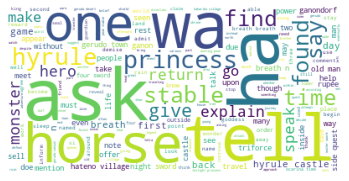

In [18]:
#Þetta er ekki rétta leiðin því ég er ekki neitt að nota TF-IDF..

superstring_hylians = ""

for hylian in hylians:
    
    file1 = open("cleanCheck/" + hylian + ".txt")
    theText = file1.read()
    
    superstring_hylians += theText


wordcloud = WordCloud(background_color="white").generate(superstring_hylians)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()

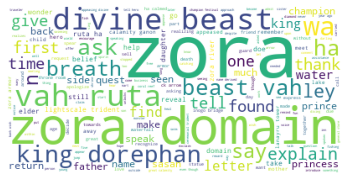

In [19]:
superstring_zoras = ""

for zora in zoras:
    
    file1 = open("cleanCheck/" + zora + ".txt")
    theText = file1.read()
    
    superstring_zoras += theText


wordcloud = WordCloud(background_color="white").generate(superstring_zoras)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()

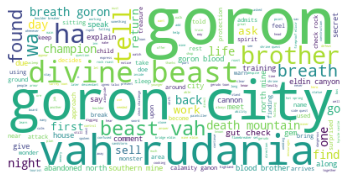

In [20]:
superstring_gorons = ""

for goron in gorons:
    
    file1 = open("cleanCheck/" + goron + ".txt")
    theText = file1.read()
    
    superstring_gorons += theText


wordcloud = WordCloud(background_color="white").generate(superstring_gorons)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()

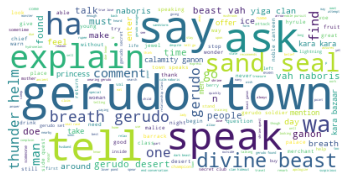

In [21]:
superstring_gerudos = ""

for gerudo in gerudos:
    
    file1 = open("cleanCheck/" + gerudo + ".txt")
    theText = file1.read()
    
    superstring_gerudos += theText


wordcloud = WordCloud(background_color="white").generate(superstring_gerudos)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()

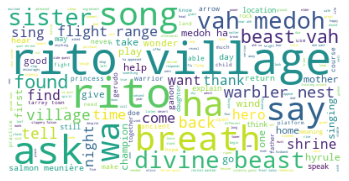

In [22]:
superstring_ritos = ""

for rito in ritos:
    
    file1 = open("cleanCheck/" + rito + ".txt")
    theText = file1.read()
    
    superstring_ritos += theText


wordcloud = WordCloud(background_color="white").generate(superstring_ritos)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
# for i in symbols:
#     data = np.char.replace(data, i, ' ')

In [465]:
file_list = []
for name in names:
    file_list.append(name + ".txt")
# print(file_list)

# for file in file_list:
#     print(file)
    

In [25]:
# Hér var ég byrjaður að gera TF-IDF / TC-IDF

# TF = Number of times term applears in document / number of words in document
# TF = freq/documentLength

# IDF = log(number of documents in Corpus / number of documents containing term)
# IDF = log(corpusLength / ÁEFTIRAÐFINNAÞETTA)

textList = []
for name in names:
#     textList.append(nltk.Text(newcorpus.words(name + '.txt')))
    theText = nltk.Text(newcorpus.words(name + '.txt'))
    fdist1 = FreqDist(theText)
    DocumentLength = len(newcorpus.words(name + '.txt'))
    corpusLength = len(newcorpus.fileids())
    
#     print(len(fdist1))
#     print(theText)

#     print(len(newcorpus.words(name + '.txt')))
#     print(len(newcorpus.fileids()))


# Þetta er byrjunin...
# Hér er ég að telja hvað hvert orð kemur oft fyrir í þessu documenti. En ég vill 
# telja Í HVERSU MÖRGUM documentum þetta orð kemur fyrir
# Þarf líklega einhvern counter.
# Eða keyra gera "for word in theText" og fara þar aftur yfir "for name in names" og keyra alla fileana
    for t in theText:
        print(t, len([True for text in theText if t in text]))
    
    for word in fdist1:
        freq = fdist1[word]
        TF = freq/length
        TC = freq
        
    print("*** NEXT FILE STARTS HERE ***")
        
#         print(word, len([True for text in theText if word in text]))
        
        
#         print(word, "->", fdist1[word], "/", len(fdist1), "=", fdist1[word]/len(fdist1))
#         print(word, "->", TF)


breath 2
n 83
ride 2
horse 42
carrying 1
wooden 1
shield 1
traveler 1
sword 1
travel 3
along 1
road 1
serenne 2
stable 12
way 3
tabantha 2
bridge 2
stable 12
back 1
reach 2
stable 12
rest 1
nearby 1
horse 42
moment 1
leaving 1
spoken 1
reveal 2
ha 13
great 1
appreciation 1
horse 42
claiming 2
see 2
world 1
horse 42
tinted 1
glass 1
also 6
tell 3
talk 3
horse 42
ha 13
difficulty 1
speaking 1
others 1
find 1
horse 42
love 1
due 1
much 1
talk 3
horse 42
wife 1
left 1
one 5
mind 1
though 2
give 3
time 3
talk 3
horse 42
taming 1
wild 1
horse 42
like 3
adopting 1
new 1
family 1
member 1
sit 1
say 5
registered 2
horse 42
companion 1
always 1
side 1
die 1
horse 42
one 5
thing 2
travel 3
without 2
long 2
ha 13
horse 42
say 5
need 2
anything 1
else 1
belief 1
horse 42
important 1
addition 2
state 1
horse 42
saddle 3
fit 3
horse 42
perfectly 1
horse 42
bridle 3
also 6
easy 1
grasp 1
elastic 1
occasionally 2
give 3
tip 1
handling 1
horse 42
saying 1
pet 1
follow 1
direction 1
work 2
hard 2
praisin

NameError: name 'length' is not defined

In [158]:
print("Numer of elements in dataframe:", len(df_characters))
print ("Number of unique races in dataframe:", len(df_characters['Race'].unique()))

Numer of elements in dataframe: 656
Number of unique races in dataframe: 27
